<a href="https://colab.research.google.com/github/mxtuttle/final-project-bdi475/blob/main/Tuttle_Final_Project_vFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to My Final Project Portfolio!

I will be examining a college basketball dataset containing information on 346 teams over the 2013-2019 seasons!

I chose this dataset for two reasons.  First off, I really like sports.  I enjoy watching, playing, and following all different sports.  Second, with the recent success of the Fighting Illini basketball team in the 2020-2021 season, I began to follow college basketball much more closely.  It quickly became one of my favorite sports to watch and I was very excited to see that there was a dataset containing information on NCAA teams.  Once I saw that this was a possibility to examine this data for my portfolio, I knew right away that it would be the one I would choose.  

In [1]:
#@title Update Colab
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.7.1

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('https://github.com/mxtuttle/final-project-bdi475/raw/main/cbb_2013.2019.csv')

This is a very detailed dataset containing information on teams over the course of 7 seasons.  Some of the questions I would like to know are: 

*   Who won the national title each year? 
*   What was the effective field goal percentage shot and turnover rate of national championship winning teams?
*   Which conference had the highest offensive and defensive efficiency per year?
*   What conference sent the most teams to the NCAA tournament in 2018?
*   What was the average free throw percentage of tournament teams in 2018?
*   How did 3-point shot percentage change over time between 2013-2019
*   What is the win dispersion by conference in 2018?
*   What was the offensive rebound dispersion in 2018?
*   How many teams went to the tournament from each conference?
*   Plot the offensive efficiency by defensive efficiency in 2017 and 2018
*   What were the winningest teams in 2018?












# **What is the size of the dataset?**

In [4]:
df.shape

(2422, 24)

# **Display the first few rows of the dataset**

In [5]:
df.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,Air Force,MWC,30,16,109.2,103.5,0.6481,54.7,51.9,18.5,19.1,23.7,31.8,30.8,36.6,52.9,54.2,38.1,32.4,64.4,-2.9,NaN,NaN,2013
1,Akron,MAC,32,25,103.4,94.4,0.7402,51.0,44.6,20.8,20.2,37.6,30.5,36.9,35.0,52.1,42.7,32.7,32.8,66.5,0.3,R64,12.0,2013
2,Alabama,SEC,35,22,102.6,89.7,0.8243,47.9,45.7,19.9,22.6,32.0,32.9,33.9,32.7,47.1,45.2,33.0,31.3,61.7,-1.5,NaN,NaN,2013
3,Alabama A&M,SWAC,29,9,89.2,111.1,0.0740,43.8,49.8,21.0,17.4,31.8,31.9,36.9,36.0,43.9,48.8,28.9,34.9,66.1,-16.0,NaN,NaN,2013
4,Alabama St.,SWAC,31,9,91.1,110.1,0.1023,45.1,49.4,22.0,19.5,33.4,34.5,32.2,38.0,44.8,47.6,30.6,35.2,67.0,-17.2,NaN,NaN,2013
5,Albany,AE,35,24,101.2,98.7,0.5722,49.6,48.3,21.2,19.9,31.7,28.2,40.0,27.8,46.7,47.6,37.0,33.1,63.2,-4.5,R64,15.0,2013
6,Alcorn St.,SWAC,32,9,85.4,101.2,0.1234,42.3,44.4,22.2,19.1,29.3,36.0,38.1,47.0,41.6,43.8,29.3,30.5,67.7,-16.7,NaN,NaN,2013
7,American,Pat,30,10,95.7,106.4,0.2266,47.3,51.3,20.2,15.6,28.5,27.0,30.9,27.9,43.8,45.7,36.2,41.1,59.9,-13.4,NaN,NaN,2013
8,Appalachian St.,SC,29,13,97.6,105.8,0.2822,49.6,51.4,19.4,18.8,30.3,30.3,37.9,35.2,47.2,52.5,36.5,32.7,68.0,-11.7,NaN,NaN,2013
9,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013


# **Let's talk data: what are the data types?**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        2422 non-null   object 
 1   CONF        2422 non-null   object 
 2   G           2422 non-null   int64  
 3   W           2422 non-null   int64  
 4   ADJOE       2422 non-null   float64
 5   ADJDE       2422 non-null   float64
 6   BARTHAG     2422 non-null   float64
 7   EFG_O       2422 non-null   float64
 8   EFG_D       2422 non-null   float64
 9   TOR         2422 non-null   float64
 10  TORD        2422 non-null   float64
 11  ORB         2422 non-null   float64
 12  DRB         2422 non-null   float64
 13  FTR         2422 non-null   float64
 14  FTRD        2422 non-null   float64
 15  2P_O        2422 non-null   float64
 16  2P_D        2422 non-null   float64
 17  3P_O        2422 non-null   float64
 18  3P_D        2422 non-null   float64
 19  ADJ_T       2422 non-null  

# **DELIVERABLE 1: NATIONAL CHAMPIONS BY YEAR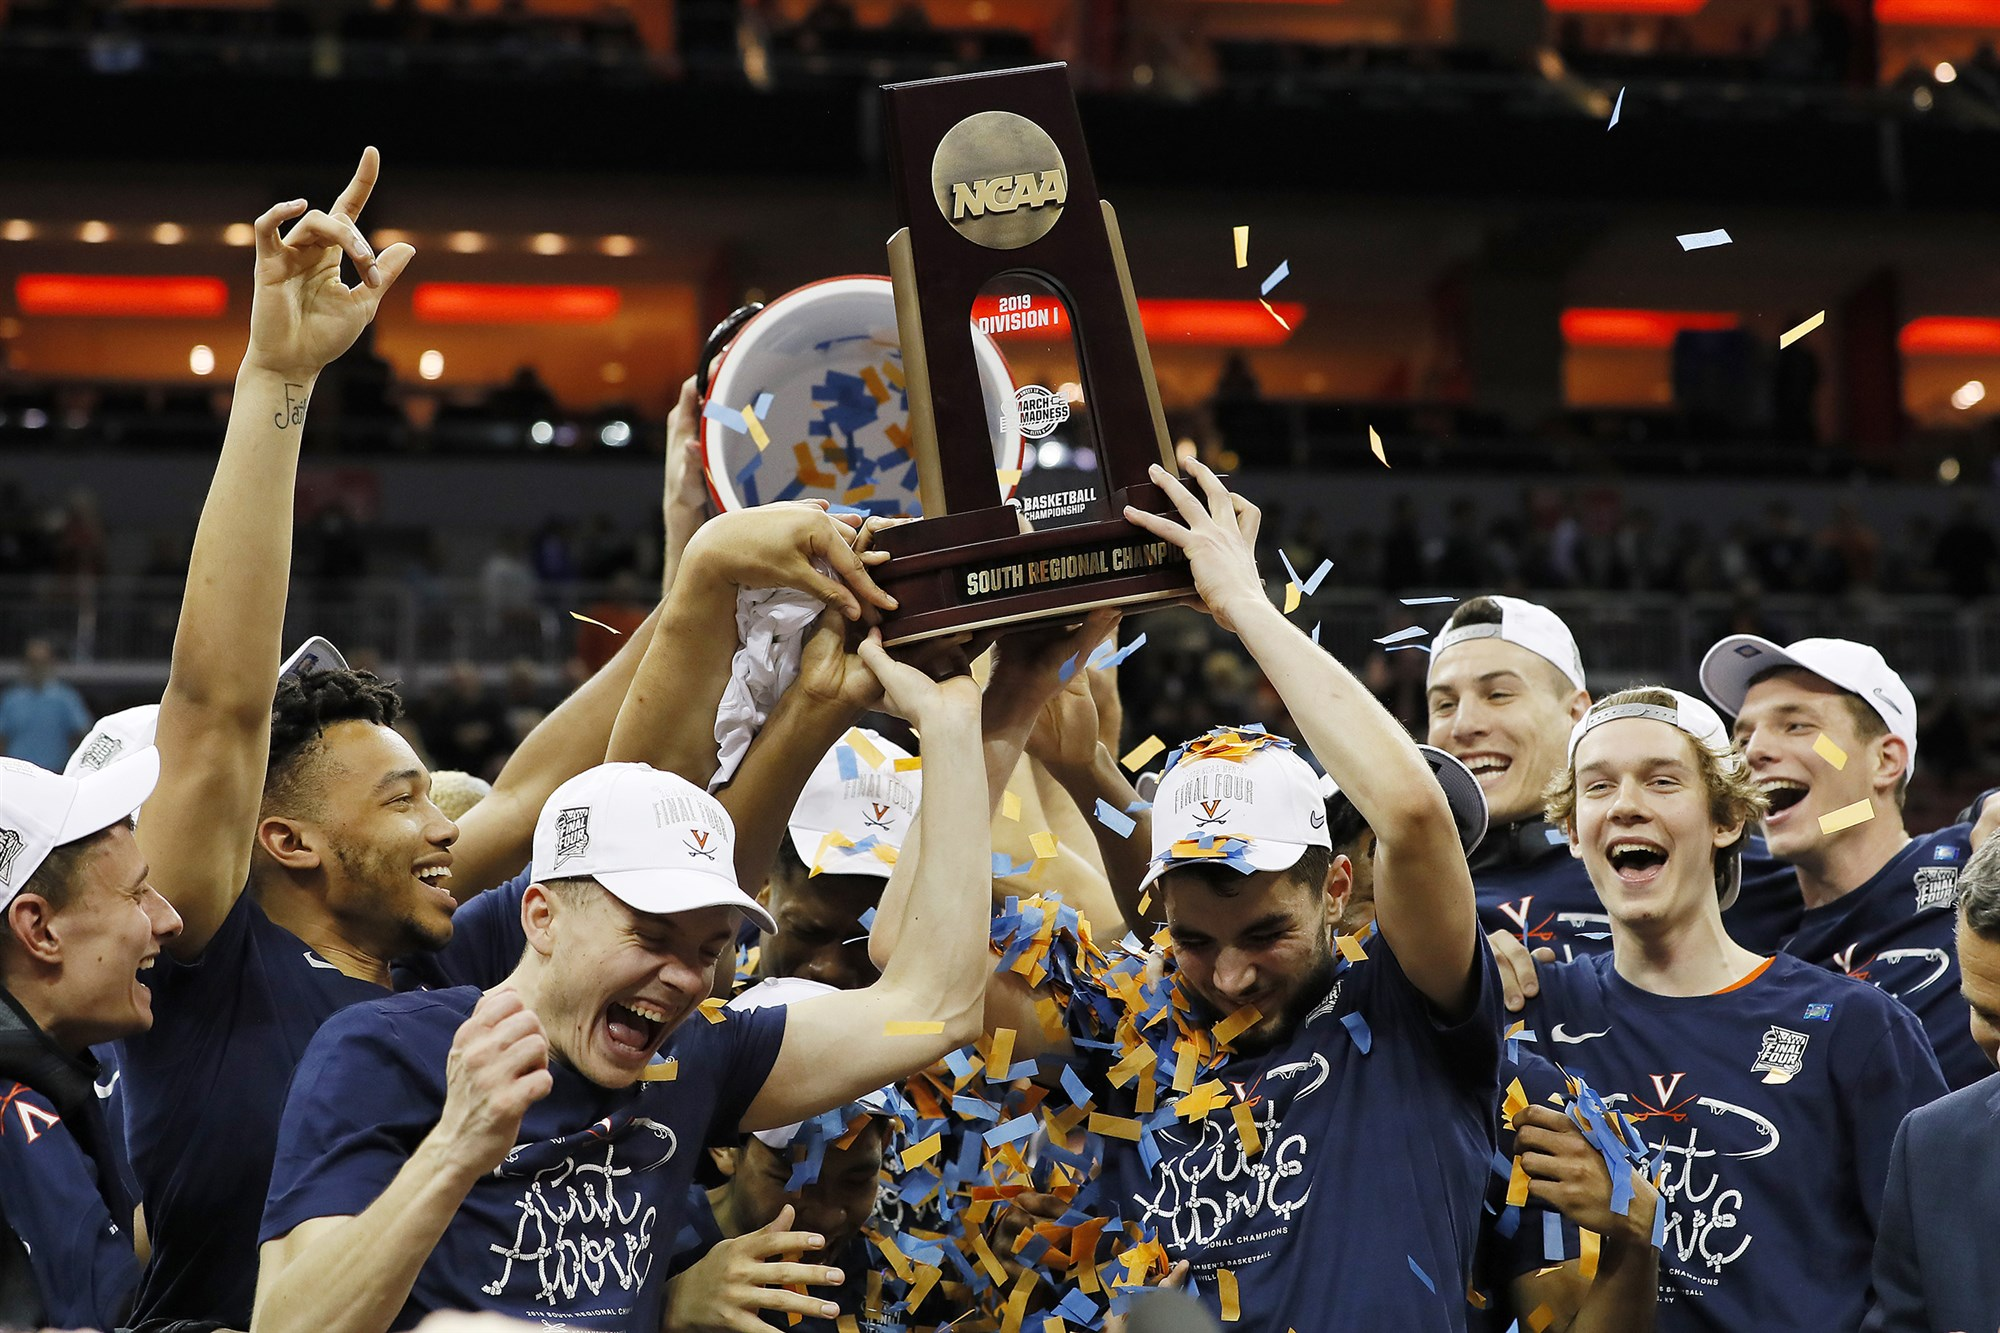**

In [7]:
df_champ = df[df['POSTSEASON'] == 'Champions']
df_champions = df_champ.drop(['G','2P_D','2P_O','3P_D','3P_O','ADJDE','ADJOE','ADJ_T','BARTHAG','DRB','EFG_D','EFG_O','FTR','FTRD','ORB','TOR','TORD','W','WAB'], axis=1)

df_champions
  

,TEAM,CONF,POSTSEASON,SEED,YEAR
145,Louisville,BE,Champions,1.0,2013
403,Connecticut,Amer,Champions,7.0,2014
763,Duke,ACC,Champions,1.0,2015
1360,Villanova,BE,Champions,2.0,2016
1576,North Carolina,ACC,Champions,1.0,2017
2052,Villanova,BE,Champions,1.0,2018
2399,Virginia,ACC,Champions,1.0,2019


# **DELIVERABLE 2: NATIONAL CHAMPIONSHIP TEAMS FIELD GOAL PERCENTAGE AND TURNOVER RATE**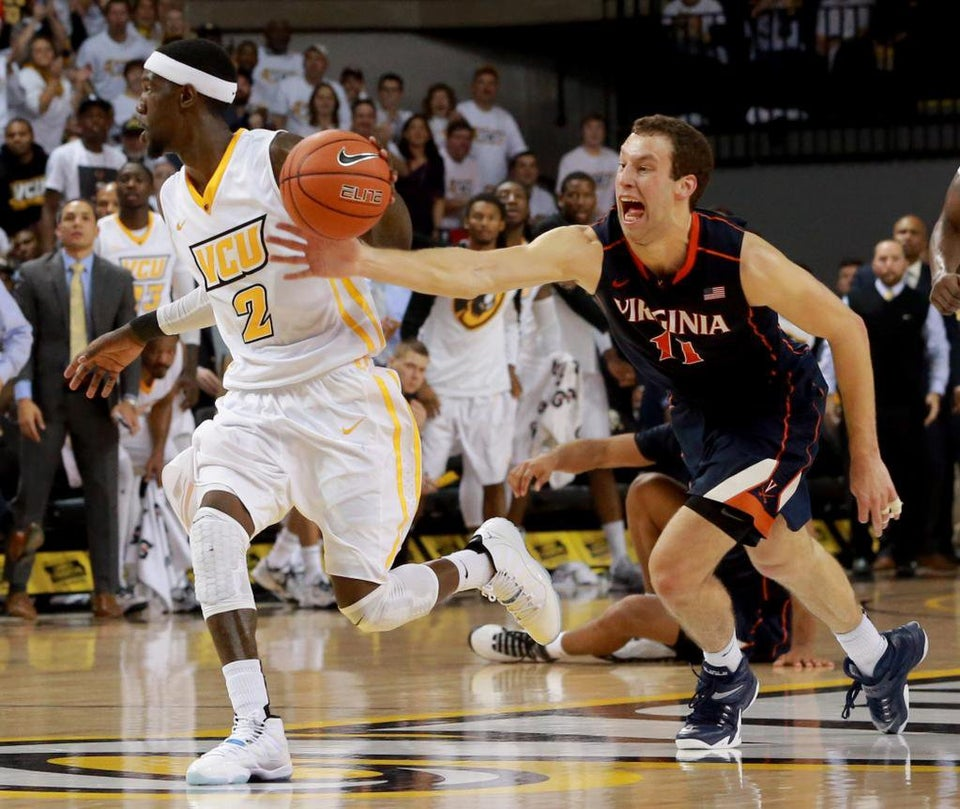

In [8]:
df_field_goal_turnover = df_champ.drop(['G','2P_D','2P_O','3P_D','3P_O','ADJDE','ADJOE','ADJ_T','BARTHAG','DRB','EFG_D','FTR','FTRD','ORB','TORD','W','WAB', 'POSTSEASON','SEED','CONF'], axis=1)

df_field_goal_turnover

,TEAM,EFG_O,TOR,YEAR
145,Louisville,50.6,18.3,2013
403,Connecticut,51.5,17.3,2014
763,Duke,56.6,16.3,2015
1360,Villanova,56.1,16.3,2016
1576,North Carolina,51.7,16.2,2017
2052,Villanova,59.5,15.0,2018
2399,Virginia,55.2,14.7,2019


Most basketball analysts will agree that the team that shoots the highest percentage from the floor and turns the ball over the least should win the game.  Let's compare the champion's field goal percentage and turnover rate of the average value in the year they won. 

In [9]:
df_average_field_goal_turnover = df.groupby(['YEAR'], as_index=False).agg({
    'EFG_O':'mean',
    'TOR':'mean'
})

df_average_field_goal_turnover

,YEAR,EFG_O,TOR
0,2013,48.533237,20.025145
1,2014,49.474855,18.350867
2,2015,48.956358,19.136705
3,2016,49.751445,18.179480
4,2017,50.347977,18.584104
5,2018,50.874855,18.435838
6,2019,50.582948,18.600289


As we can see by simply comparing the dataframes created, the national champion beat the national average every year in field goal percentage and was lower than the national average for turnover rate.  The analysts were right!

# **DELIVERABLE 3: MOST EFFICIENT OFFENSIVE AND DEFENSIVE CONFERENCES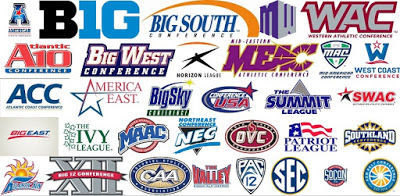**

First, let's look at the most efficient offensive conference by average Adjusted Offensive Efficiency (ADJOE).

In [10]:
df_conferences_efficiency = df.groupby(['CONF', 'YEAR'], as_index=False).agg({
    'ADJOE':'mean',
}).rename(columns ={
    'ADJOE':'Offensive Efficiency',
}) 

df_conferences_efficiency.sort_values('Offensive Efficiency', ascending=False)

,CONF,YEAR,Offensive Efficiency
53,BE,2018,114.920000
45,B12,2017,114.810000
11,ACC,2017,114.560000
46,B12,2018,114.210000
42,B12,2014,113.580000
...,...,...,...
90,GWC,2013,91.240000
192,SWAC,2015,91.160000
225,ind,2013,91.100000
120,MEAC,2013,90.769231


Next, let's look at Defensive Efficiency measured by Adjusted Defensive Efficiency (ADJDE)

In [11]:
df_conferences_efficiency = df.groupby(['CONF', 'YEAR'], as_index=False).agg({
    'ADJDE':'mean'
}).rename(columns ={
    'ADJDE':'Defensive Efficiency'
}) 

df_conferences_efficiency.sort_values('Defensive Efficiency', ascending=False)

,CONF,YEAR,Defensive Efficiency
125,MEAC,2018,113.630769
194,SWAC,2017,112.810000
124,MEAC,2017,112.146154
195,SWAC,2018,111.660000
63,BSth,2014,111.066667
...,...,...,...
47,B12,2019,94.380000
40,B10,2019,94.114286
43,B12,2015,93.560000
48,BE,2013,92.686667


This is an interesting conclusion- in 2018, the national champion (Villanova) came from the conference with the highest offensive efficiency, the Big East.  The most efficient defensive conferences are non-Power 5 conferences, with the Mid-Eastern Athletic Conference, Southwestern Athletic Conference, and Big South rounding out the top 5 years.

# **DELIVERABLE 4: WHICH CONFERENCE SENT THE MOST TEAMS TO THE NCAA TOURNAMENT IN 2018?**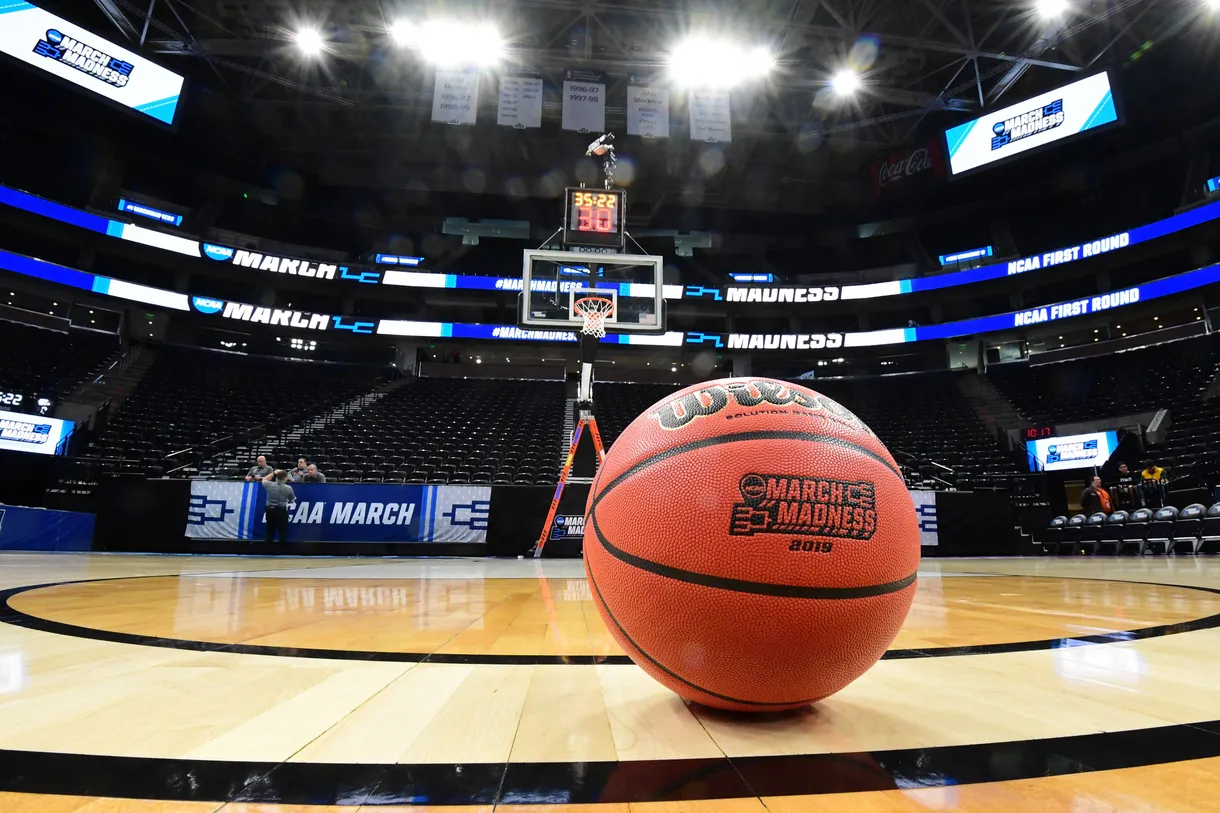

In [12]:
df_2018 = df[df['YEAR'] == 2018]
df_tourney_by_conference = df_2018.groupby(['CONF'], as_index=False).agg({
    'POSTSEASON':'count'
}).rename(columns = {
    'POSTSEASON':'Num_Teams_in_Tourney'
})

df_tourney_by_conference.sort_values('Num_Teams_in_Tourney', ascending=False)

,CONF,Num_Teams_in_Tourney
1,ACC,9
26,SEC,8
6,B12,7
7,BE,6
5,B10,4
0,A10,3
4,Amer,3
22,P12,3
19,MWC,2
24,SB,1


The ACC sent the most teams to the tournament in 2018 with 8.

# **DELIVERABLE 5: AVERAGE FREE THROW PERCENTAGE OF TOURNAMENT TEAMS IN 2018**








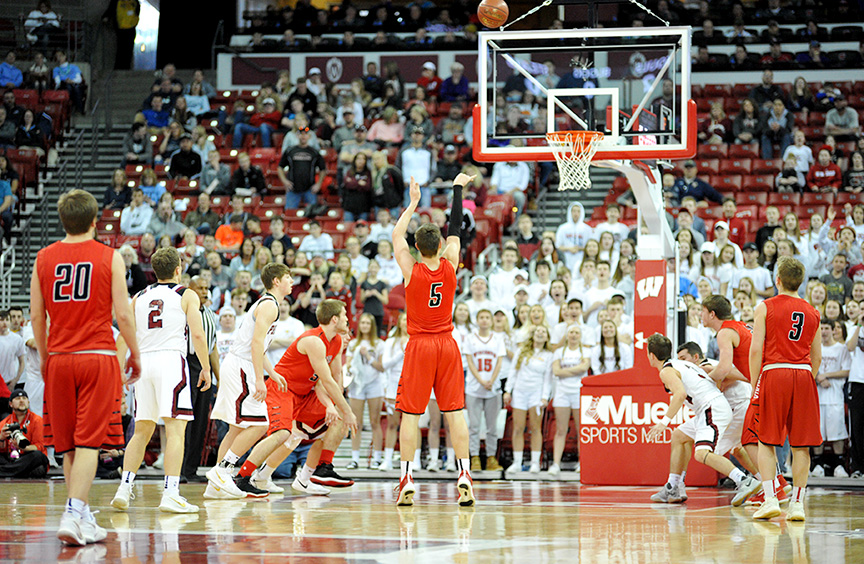

The free throw line is commonly referred to as the "charity stripe."  A team cannot win games if they do not capitalize on these opportunities for free points.  Let's examine how the teams in the tournament performed.

In [13]:
df_2018_tourney = df_2018[df_2018['SEED'] > 0]

df_free_throw_tournament=df_2018_tourney.drop(['G','2P_D','2P_O','3P_D','3P_O','ADJDE','ADJOE','ADJ_T','BARTHAG','DRB','EFG_D','EFG_O','TOR','FTRD','ORB','TORD','W','WAB', 'POSTSEASON','CONF'], axis=1)

df_free_throw_tournament.sort_values('FTR', ascending=False)

,TEAM,FTR,SEED,YEAR
1766,Cal St. Fullerton,45.6,15.0,2018
1862,Kentucky,44.0,5.0,2018
2017,Texas Southern,42.9,16.0,2018
1760,Bucknell,42.6,14.0,2018
1732,Alabama,41.9,9.0,2018
...,...,...,...,...
1790,Creighton,26.5,8.0,2018
1762,Butler,26.1,10.0,2018
2036,UNC Greensboro,26.0,13.0,2018
1792,Davidson,24.6,12.0,2018


It is very surprising to see that during the 2018 tournament, the team that had the highest free throw shooting percentage was a #15 seed.

# **DELIVERABLE 6: HOW HAS 3-POINT PERCENTAGE CHANGED OVER THE PERIOD 2013-2019**

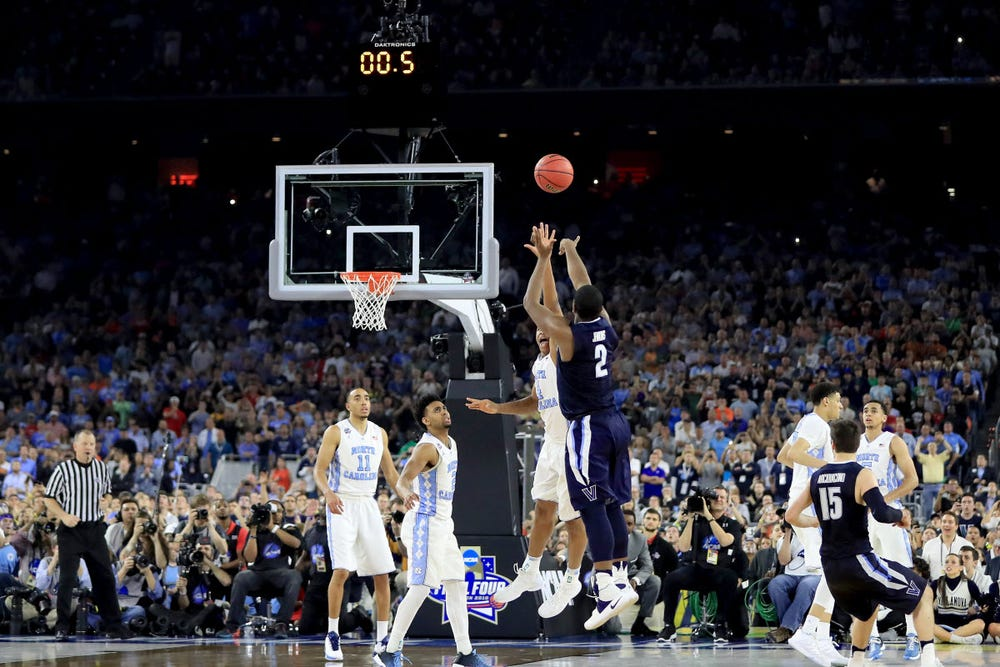

The 3-point shot has increasingly become more popular over the past decade thanks to its increased use in the NBA.  As one of the more efficient shots in basketball, I assume that the shooting percetage will increase as players take more shots and it plays a larger role in the college game.

In [14]:
df_3pt = df.groupby(['YEAR'], as_index=False).agg({
    '3P_O':'mean'
}).rename(columns={
    '3P_O':'3-Point Percentage'
})

df_3pt

,YEAR,3-Point Percentage
0,2013,33.719364
1,2014,34.269653
2,2015,34.145665
3,2016,34.495665
4,2017,34.829191
5,2018,34.983526
6,2019,34.282370


This result is surprising to me.  Let's drill down more and examine how the shot has been changing in the Power Five conferences (I will also be including the Big East).

In [15]:
df_power_5=df[(df['CONF'] == 'ACC') ^ (df['CONF'] == 'BE') ^ (df['CONF'] == 'B10') ^ (df['CONF'] == 'B12') ^ (df['CONF'] == 'P12') ^ (df['CONF'] == 'SEC')]

df_power_5_3pt = df_power_5.groupby(['YEAR', 'CONF'], as_index=False).agg({'3P_O':'mean'}).rename(columns={'3P_O':'3-Point Percentage'})

df_power_5_3pt

,YEAR,CONF,3-Point Percentage
0,2013,ACC,35.358333
1,2013,B10,33.550000
2,2013,B12,32.970000
3,2013,BE,32.933333
4,2013,P12,34.491667
5,2013,SEC,33.342857
6,2014,ACC,34.373333
7,2014,B10,34.583333
8,2014,B12,34.900000
9,2014,BE,34.740000


My hypothesis was clearly incorrect.  In the Power 5 conferences, there is little to no correlation between increased use of the 3-point shot and an increase in accuracy.

# **DELIVERABLE 7: PLOTTING WIN DISPERSION BY CONFERENCE IN 2018**

In [16]:
fig = px.box(df_2018, x='W', y='CONF', orientation='h', title = 'Win Dispersion by Conference')
fig.show()

# **DELIVERABLE 8: OFFENSIVE REBOUND HISTOGRAM FOR 2018**

In [17]:
fig = px.histogram(df_2018, x='ORB', title= 'Offensive Rebound Distribution')
fig.show()

#**DELIVERABLE 9: NUMBER OF TEAMS IN THE 2018 TOURNAMENT BY CONFERENCE**

In [18]:
fig= px.bar(
    df_tourney_by_conference,
    x='CONF',
    y='Num_Teams_in_Tourney',
    title = 'Number of Teams in 2018 NCAA Tournament by Conference'
)
fig.show()

# **DELIVERABLE 10: OFFENSIVE EFFICIENCY BY DEFENSIVE EFFICIENCY BROKEN DOWN BY CONFERENCE IN 2018** 

In [19]:

df_2017_2018 = df[(df['YEAR'] == 2018) ^ (df['YEAR'] == 2017)]

fig = px.scatter(
    df_2017_2018,
    title='Offensive and Defensive Efficiency in 2017 and 2018',
    x="ADJOE",
    y="ADJDE",
    size="W",
    color="CONF",
    template='plotly_dark',
    width=800,
    height=400
)
fig.show()

# **DELIVERABLE 11: TOP TEAMS BY WINS IN 2018**

In [20]:

df_2018_best_teams = df_2018[df_2018['W'] > 20]

fig = px.treemap(
    df_2018_best_teams,
    path= ['TEAM'],
    title='Winningest Teams in 2018',
    values='W',
    height=700
)

fig.show()

### *Examining this dataset has lead me to draw many interesting conclusions.  Over the period covered (2013-2019), Villanova was the most successful team, winning the national title twice. Their conference, the Big East, and the ACC dominated the period, with teams from the two of them winning 6 of 7 national titles.  Another conclusion drawn was that field goal percentage, average offensive efficiency, and turnover rate were the three most important statistics determing winning teams.  Tournament winning teams had both above average field goal percentage and below average turnover rates.  The Big East, the most successful conference, topped the list in offensive efficiency.  Overall, the analysis performed in this dataset would prove very helpful to any college coach looking to for ways to improve his or her team's performance or when evaluating potential recruits to see if they would fit in a given system at a given program.  The data was very interesting for me to examine and will surely affect how I watch the game in the future.*